In [3]:
!jt -f opensans -fs 10 -nf opensans -nfs 12 -ofs 10 -dfs 10 -tf opensans -tfs 12

# CUSTOMER SEGMENTATION ANALYSIS

You are welcome to walk through this project with me. In this project, the RFM model is combined with the K-means clustering method to identify segments that form the core customer base for an online retail store. These customer segments identified can then be used to tailor marketing campaigns toward each customer segment to maximize marketing efforts and also increase revenue.

The data used for this project was gathered from the TATA virtual internship program on Forage.

### 1.0     Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ydata_profiling as yp
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 2.0     Loading the Dataset

In [3]:
data = pd.read_excel('C:/Users/Dechamp/OneDrive/Desktop/Transactions_Data.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530097,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530098,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530099,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530100,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### 3.0     Data Exploration

In [4]:
from ydata_profiling import ProfileReport
EDA_Data = ProfileReport(data, title="Exploratoy Data Analysis_Data")
EDA_Data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The result of the automated data exploration shows the following:

* There are 132,219 rows with null values in the customer ID Column
* The stockcode data type is currently unsupported because some row contain numbers while other rows contain string data type.
* The datatype for the customer ID column is a float data type instead of a integer.

In [5]:
data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### 4.0     Data Cleaning

#### 4.1     Adjusting the data type for the StockCode column

In [6]:
data['StockCode'] = data['StockCode'].astype(str)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530097,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530098,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530099,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530100,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### 4.2     Removing the Null rows to enhance data quality

In [7]:
data.dropna(inplace=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530097,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530098,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530099,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530100,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### 4.3     Adjusting the data type for the Customer ID Column

In [8]:
data['CustomerID'] = data['CustomerID'].astype(int)

Previewing the data types for each column in the dataset to ensure that all the changes have been effected

In [9]:
data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [10]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
530097,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
530098,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
530099,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
530100,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [11]:
data.reset_index(inplace=True)

In [12]:
data.drop('index', axis=1, inplace=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397878,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397879,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397880,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397881,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [13]:
last_txn_date = data['InvoiceDate'].max()
last_txn_date

Timestamp('2011-12-09 12:50:00')

In [14]:
rfm_df = data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda InvoiceDate : (last_txn_date - InvoiceDate.max()).days,
    'InvoiceNo': lambda InvoiceNo : InvoiceNo.nunique(),
    'TotalSales': lambda TotalSales : TotalSales.sum()})

rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df.reset_index(inplace=True)

rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40
...,...,...,...,...
4333,18280,277,1,180.60
4334,18281,180,1,80.82
4335,18282,7,2,178.05
4336,18283,3,16,2094.88


In [15]:
col_names = ['Recency', 'Frequency', 'Monetary']
features = rfm_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347
...,...,...,...
4333,1.854587,-0.425097,-0.208459
4334,0.884612,-0.425097,-0.219560
4335,-0.845342,-0.295178,-0.208742
4336,-0.885341,1.523687,0.004519


In [16]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(scaled_features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[13014.0,
 9012.644725352138,
 5439.304685956849,
 4092.20951893576,
 3118.2865692550804,
 2476.778374435019,
 2022.3501054971023,
 1714.7161120407077,
 1442.743479268802]

Text(0, 0.5, 'Within-Cluster Sum of Squares')

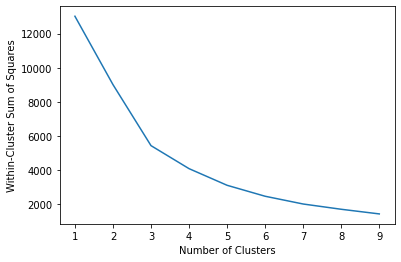

In [17]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

In [18]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=5)

In [19]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.6165639895861048


In [20]:
identified_cluster = kmeans.predict(scaled_features)
identified_cluster

array([4, 0, 0, ..., 0, 4, 0])

In [21]:
rfm_df['identified_cluster'] = identified_cluster
rfm_df

,CustomerID,Recency,Frequency,Monetary,identified_cluster
0,12346,325,1,77183.60,4
1,12347,1,7,4310.00,0
2,12348,74,4,1797.24,0
3,12349,18,1,1757.55,0
4,12350,309,1,334.40,1
...,...,...,...,...,...
4333,18280,277,1,180.60,1
4334,18281,180,1,80.82,1
4335,18282,7,2,178.05,0
4336,18283,3,16,2094.88,4


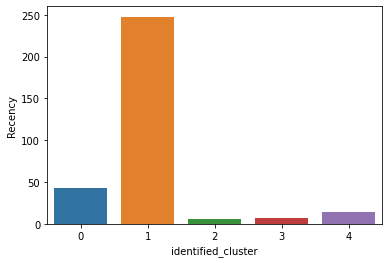

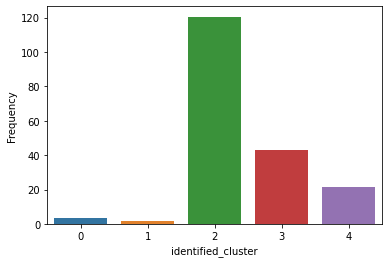

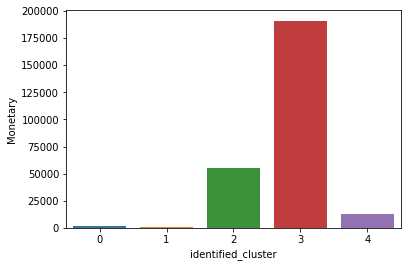

In [22]:
lists = ['Recency', 'Frequency', 'Monetary']
rfm = rfm_df.groupby(['identified_cluster'], as_index=False).mean()

for i in lists:
    sns.barplot(x= rfm['identified_cluster'],y=str(i), data=rfm)
    plt.show()

In [23]:
rfm_df['identified_cluster'] = rfm_df['identified_cluster'].replace({0:'Roaming', 1:'High Value', 2:'Churned', 3:'Loyal',4:'New'})

rfm_df

,CustomerID,Recency,Frequency,Monetary,identified_cluster
0,12346,325,1,77183.60,New
1,12347,1,7,4310.00,Roaming
2,12348,74,4,1797.24,Roaming
3,12349,18,1,1757.55,Roaming
4,12350,309,1,334.40,High Value
...,...,...,...,...,...
4333,18280,277,1,180.60,High Value
4334,18281,180,1,80.82,High Value
4335,18282,7,2,178.05,Roaming
4336,18283,3,16,2094.88,New


In [24]:
rfm_df.to_csv('rfms.csv')

In [25]:
data_with_segments = data.merge(rfm_df, how='inner', on='CustomerID')

data_with_segments

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Recency,Frequency,Monetary,identified_cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,371,34,5391.21,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,371,34,5391.21,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,371,34,5391.21,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,371,34,5391.21,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,371,34,5391.21,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397878,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,15.00,0,1,848.55,Roaming
397879,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,0,1,848.55,Roaming
397880,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,0,1,848.55,Roaming
397881,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,24.96,0,1,848.55,Roaming


In [26]:
data_with_segments.drop(['Recency', 'Frequency', 'Monetary'], axis=1, inplace=True)

data_with_segments

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,identified_cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
...,...,...,...,...,...,...,...,...,...,...
397878,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,15.00,Roaming
397879,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,Roaming
397880,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,Roaming
397881,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,24.96,Roaming


In [27]:
data_with_segments.rename(columns = {'identified_cluster' : 'Customer Group'}, inplace=True)

data_with_segments

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Customer Group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,New
...,...,...,...,...,...,...,...,...,...,...
397878,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,15.00,Roaming
397879,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,Roaming
397880,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,10.20,Roaming
397881,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,24.96,Roaming


In [28]:
columns = ['InvoiceDate', 'InvoiceNo', 'CustomerID', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalSales', 'Country', 'Customer Group']

data_with_segments = data_with_segments[columns]

data_with_segments

,InvoiceDate,InvoiceNo,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalSales,Country,Customer Group
0,2010-12-01 08:26:00,536365,17850,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom,New
1,2010-12-01 08:26:00,536365,17850,71053,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom,New
2,2010-12-01 08:26:00,536365,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom,New
3,2010-12-01 08:26:00,536365,17850,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom,New
4,2010-12-01 08:26:00,536365,17850,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom,New
...,...,...,...,...,...,...,...,...,...,...
397878,2011-12-09 12:16:00,581578,12713,22993,SET OF 4 PANTRY JELLY MOULDS,12,1.25,15.00,Germany,Roaming
397879,2011-12-09 12:16:00,581578,12713,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,0.85,10.20,Germany,Roaming
397880,2011-12-09 12:16:00,581578,12713,22908,PACK OF 20 NAPKINS RED APPLES,12,0.85,10.20,Germany,Roaming
397881,2011-12-09 12:16:00,581578,12713,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2.08,24.96,Germany,Roaming


In [ ]:
data_with_segments.rename(columns = {'Customer_Group' : 'CustomerGroup'}, inplace=True)

data_with_segments